# 数据预处理
## 读取数据集,分析自行车商店的销售额

举一个例子，我们首先(**在CSV（逗号分隔值）文件**)
`../data/sales_data.csv`中。
以其他格式存储的数据也可以通过类似的方式进行处理。
下面我们将数据集按行写入CSV文件中。

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
!head data/sales_data.csv

'head' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


## 读取数据

In [17]:
import os
os.makedirs(os.path.join('..','data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'sales_data.csv')

data = pd.read_csv(data_file, parse_dates=['Date'])


## 数据信息

In [18]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [20]:
data.shape

(113036, 18)

In [21]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## 处理缺失值
“NaN”项代表缺失值。
[**为了处理缺失的数据，典型的方法包括*插值法*和*删除法*，**]
其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。

### 插值法
插值法是通过填充缺失值来保留数据集的完整性。插值法的主要目的是使用已有的数据来估计和替换缺失值，以便可以继续进行数据分析和建模。常见的插值方法包括：

均值插值（Mean Imputation）：

用特征列的均值替换缺失值。
适用于数据分布较为对称的情况。
缺点：可能低估数据的变异性。

In [22]:
import pandas as pd
df['column'] = df['column'].fillna(df['column'].mean())


NameError: name 'df' is not defined

中位数插值（Median Imputation）：

用特征列的中位数替换缺失值。
适用于存在离群值的数据集。
缺点：也可能低估数据的变异性。

In [ ]:
df['column'] = df['column'].fillna(df['column'].median())


众数插值（Mode Imputation）：

用特征列的众数替换缺失值。
适用于分类数据。

In [ ]:
df['column'] = df['column'].fillna(df['column'].mode()[0])

线性插值（Linear Interpolation）：
适用于时间序列数据，用线性关系估计缺失值。

In [ ]:
df['column'] = df['column'].interpolate(method='linear')

前向填充和后向填充（Forward Fill and Backward Fill）：
用前一个或后一个非缺失值填充缺失值。
适用于时间序列数据。

In [ ]:
df['column'] = df['column'].fillna(method='ffill')  # 前向填充
df['column'] = df['column'].fillna(method='bfill')  # 后向填充

删除法（Deletion）
删除法是直接去除包含缺失值的数据点或特征。删除法的主要目的是通过去除缺失值来简化数据处理过程，但会导致数据量减少。常见的删除方法包括：

删除行（Row Deletion）：

删除包含缺失值的行。
适用于缺失值较少的情况。
缺点：可能会丢失大量数据，影响分析结果。

In [ ]:
df = df.dropna()  # 删除任何包含缺失值的行

删除列（Column Deletion）：

删除包含缺失值的列。
适用于特征缺失值比例较高或特征重要性较低的情况。
缺点：可能会丢失重要特征。

In [ ]:
df = df.dropna(axis=1)  # 删除任何包含缺失值的列

## 数值分析和可视化
分析'Unit_Cost'列

In [23]:
data['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [24]:
data['Unit_Cost'].mean()

267.296365759581

In [25]:
data['Unit_Cost'].median() # 中位数

9.0

### 绘制一个箱线图（Box Plot）
- data['Unit_Cost']: 选择data数据集中的Unit_Cost列。
- .plot(kind='box', vert=False, figsize=(14,6)): 调用plot方法绘制箱线图。
- kind='box': 指定绘图类型为箱线图。
- vert=False: 指定箱线图为水平显示。
- figsize=(14,6): 指定图形的尺寸为14英寸宽，6英寸高。

<AxesSubplot:>

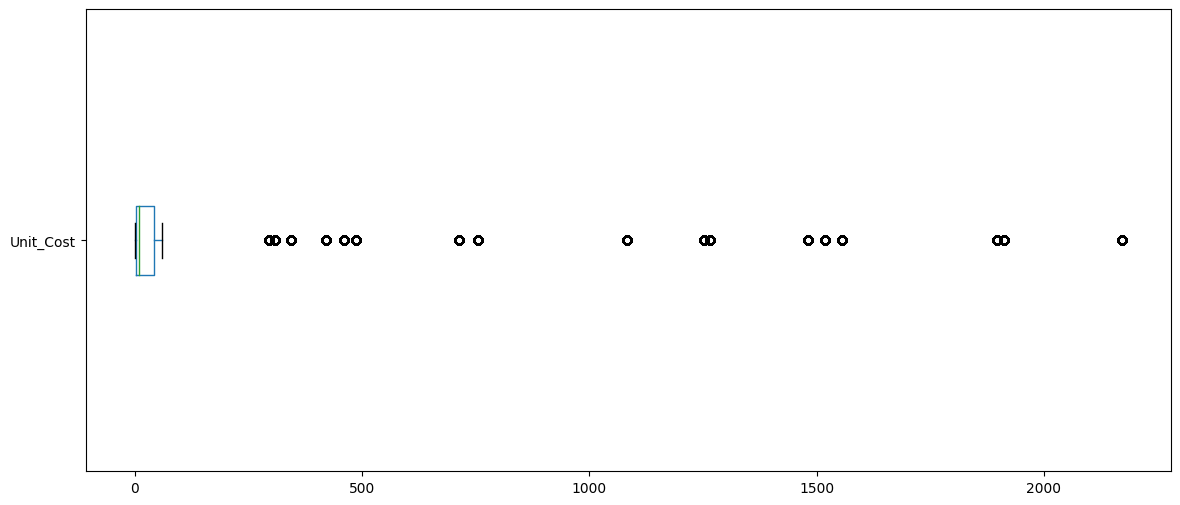

In [26]:
data['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6)) 

### 绘制一个核密度估计（KDE）图 
- 显示数据集中Unit_Cost列的概率密度分布
- .plot(kind='density', figsize=(14,6)): 调用plot方法绘制密度图。
- kind='density': 指定绘图类型为密度图（等价于kind='kde'）。
- figsize=(14,6): 指定图形的尺寸为14英寸宽，6英寸高。

添加垂直线
- ax.axvline(sales['Unit_Cost'].mean(), color='red'): 在平均值位置添加一条红色垂直线。
- ax.axvline(sales['Unit_Cost'].median(), color='green'): 在中位数位置添加一条绿色垂直线。

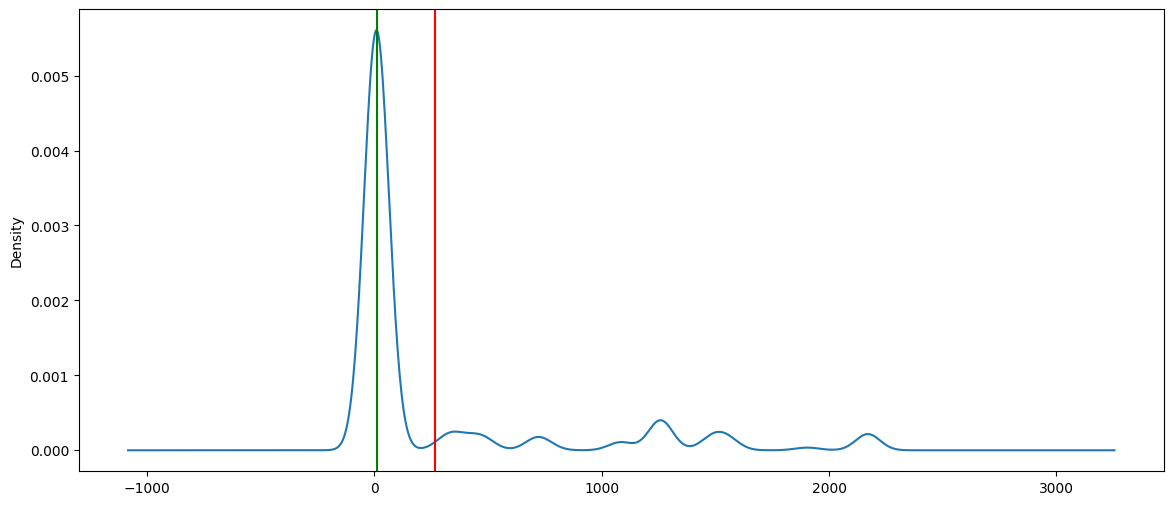

In [29]:
ax = data['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Unit_Cost'].mean(), color='red')
ax.axvline(data['Unit_Cost'].median(), color='green')

### 绘制sales数据集中Unit_Cost列的直方图，并设置X轴和Y轴的标签
绘制直方图：

sales['Unit_Cost'].plot(kind='hist', figsize=(14,6)): 绘制直方图，图形尺寸为14x6英寸。
设置轴标签：

ax.set_ylabel('Number of Sales'): 设置Y轴标签为“Number of Sales”。
ax.set_xlabel('dollars'): 设置X轴标签为“dollars”。

Text(0.5, 0, 'dollars')

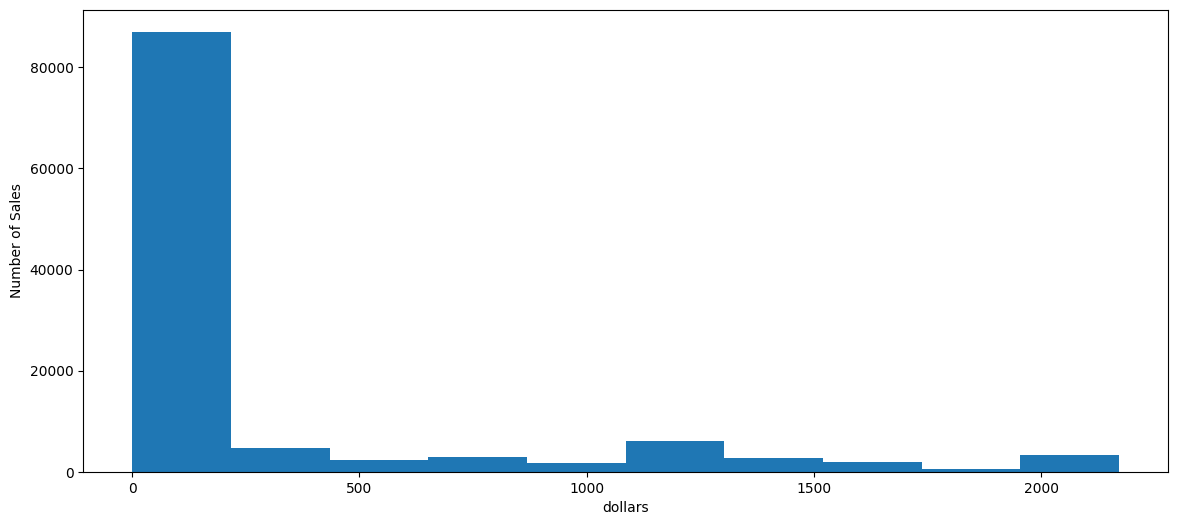

In [30]:
ax = data['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

## 分类分析和可视化
分析Age_Group列

In [31]:
data['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

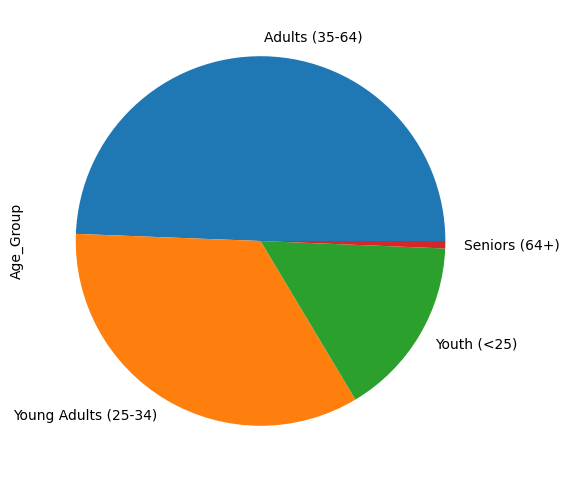

In [33]:
data['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

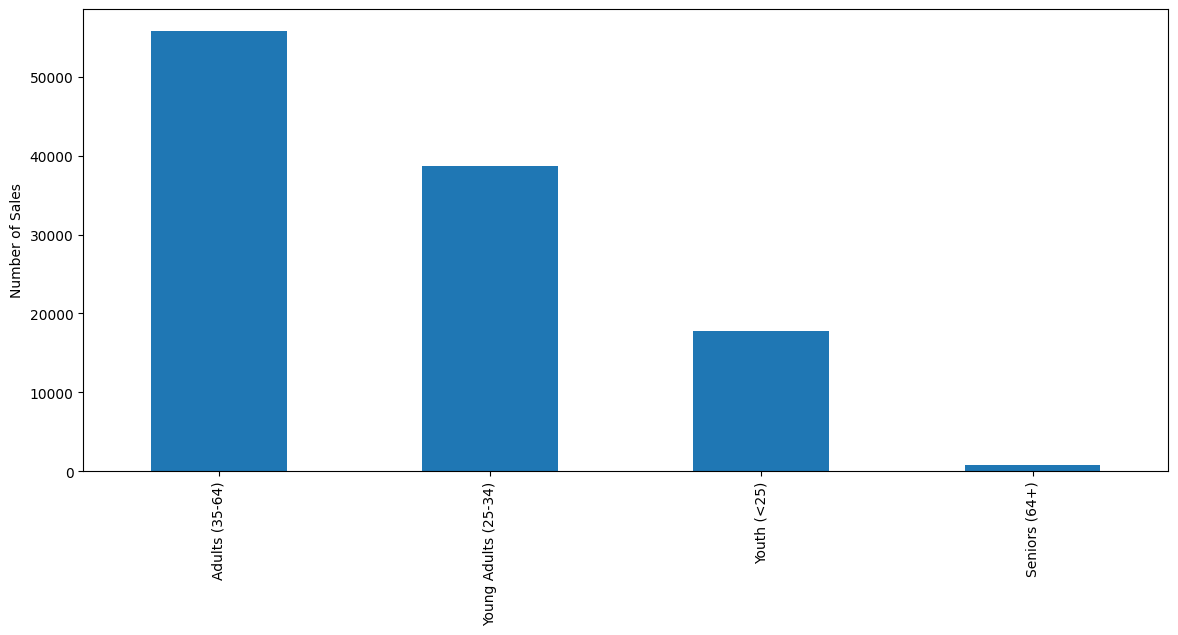

In [34]:
ax = data['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

## 一个数据集各列之间的相关系数矩阵。
- 相关系数矩阵显示了每对变量之间的相关性强度和方向。
- 相关系数矩阵解释
- 相关系数（Correlation Coefficient）：

相关系数的取值范围是 -1 到 1。

1 表示完全正相关，意味着一个变量增加，另一个变量也会增加。

-1 表示完全负相关，意味着一个变量增加，另一个变量会减少。

0 表示没有线性相关关系。

对角线元素：

矩阵对角线上的元素都是1，因为每个变量与其自身完全相关。
相关性解读：

查看两个变量之间的相关系数，越接近1或-1，说明相关性越强，接近0则相关性越弱。

In [35]:
corr = data.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


- Unit_Cost和Unit_Price之间几乎完全正相关。
- Order_Quantity与Unit_Cost、Unit_Price之间有显著的负相关关系。
- Profit、Cost和Revenue之间有非常高的正相关关系。

### 一个相关系数矩阵的热图（Heatmap）
以便直观地展示数据集中各变量之间的相关性。

创建一个新的图形对象：

fig = plt.figure(figsize=(8,8)): 创建一个图形对象，图形尺寸为8x8英寸。
绘制相关系数矩阵的热图：

plt.matshow(corr, cmap='RdBu', fignum=fig.number): 使用matshow方法绘制相关系数矩阵，颜色映射（cmap）使用'RdBu'，该映射使用红色和蓝色来表示正负相关，fignum=fig.number指定将热图绘制到刚创建的图形对象上。
设置X轴和Y轴的刻度标签：

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical'): 设置X轴刻度标签为相关系数矩阵的列名，并使标签垂直显示。
plt.yticks(range(len(corr.columns)), corr.columns): 设置Y轴刻度标签为相关系数矩阵的列名。


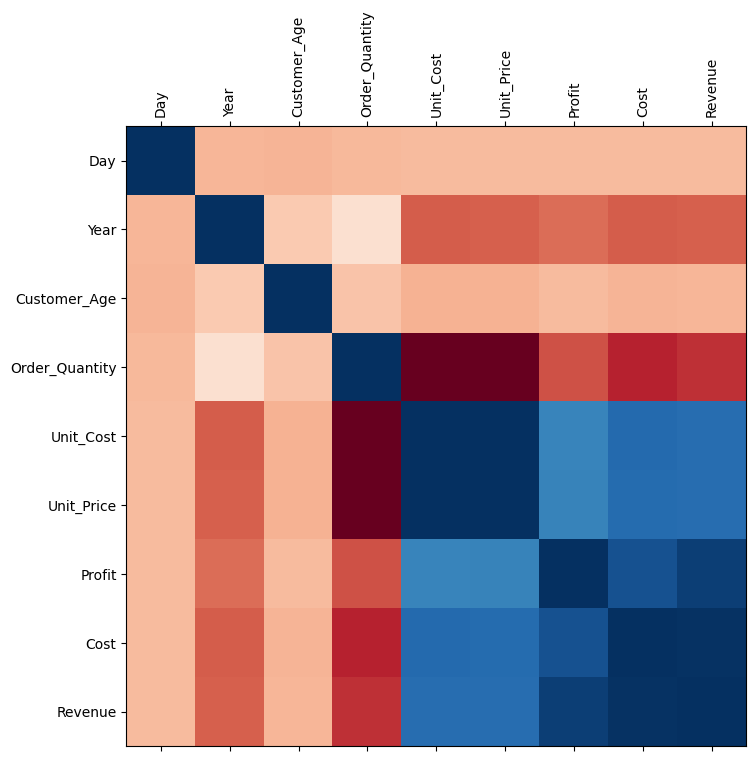

In [36]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

看到一个显示相关系数矩阵的热图，颜色代表变量之间的相关性强度和方向。正相关为红色，负相关为蓝色，颜色越深，相关性越强。

### 绘制了一个散点图，展示数据集中Customer_Age与Revenue之间的关系

绘制散点图：
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6)): 绘制散点图，X轴为Customer_Age，Y轴为Revenue，图形尺寸为6x6英寸。

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

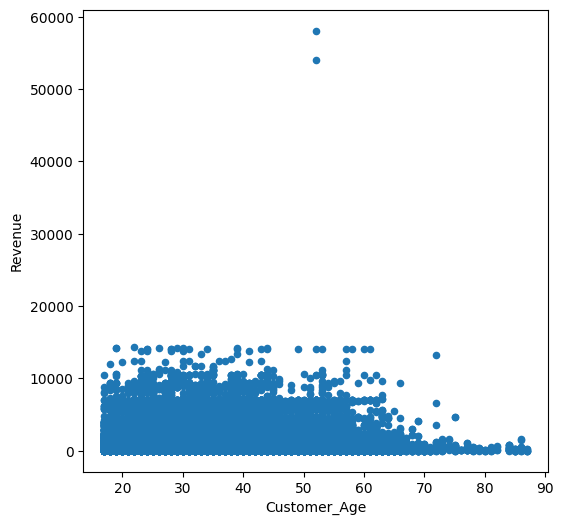

In [37]:
data.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

### 通过散点图，可以直观地观察这两个变量之间的关系模式（例如，是否存在线性关系、非线性关系或无明显关系）

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

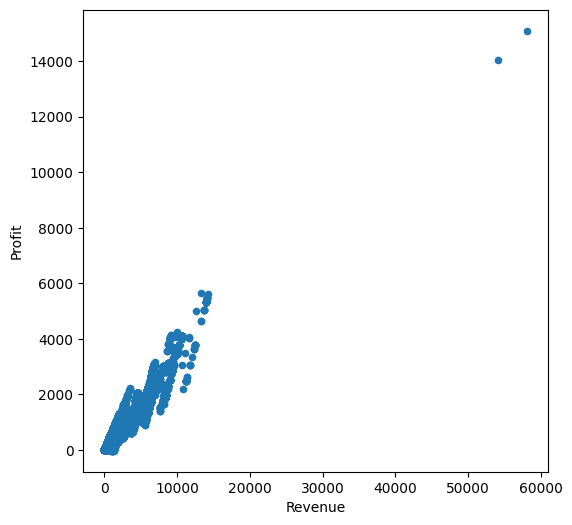

In [38]:
data.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

### 一个按Age_Group分组的Profit箱线图，并设置Y轴标签

选择数据：
sales[['Profit', 'Age_Group']]: 选择sales数据集中的Profit和Age_Group列。

绘制按组箱线图：
.boxplot(by='Age_Group', figsize=(10,6)): 按Age_Group分组绘制箱线图，图形尺寸为10x6英寸。

设置Y轴标签：
ax.set_ylabel('Profit'): 设置Y轴标签为“Profit”。

### 解释箱线图
箱线图（Box Plot）是一种显示数据分布情况的统计图表，它显示数据的中位数、四分位数、最小值、最大值和异常值（outliers）。在按组绘制的箱线图中，每个组的箱线图显示该组数据的分布情况。

Text(0, 0.5, 'Profit')

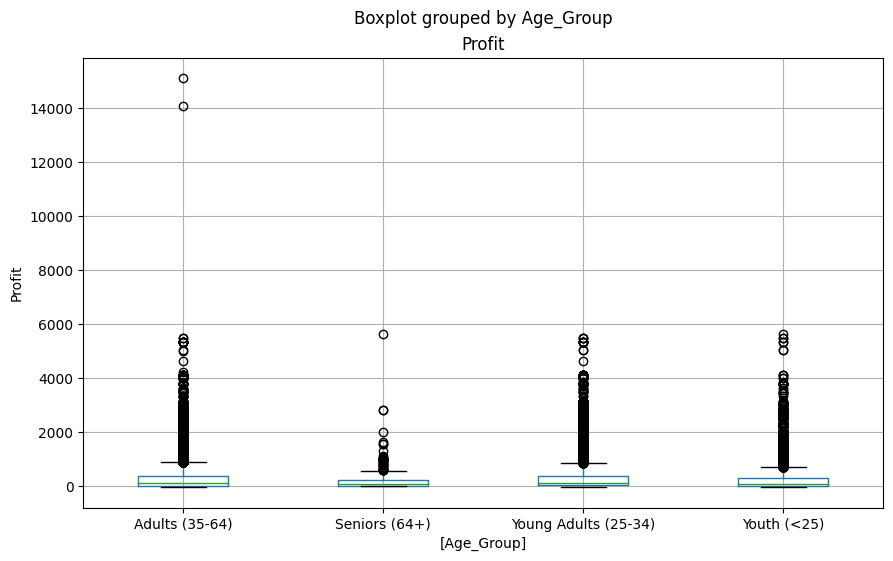

In [39]:
ax = data[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

你将看到一个按Age_Group分组的Profit箱线图，通过该图可以观察各个年龄组中利润的分布情况，包括中位数、四分位数、最小值、最大值和异常值。

绘制了一个包含多个列的箱线图（Box Plot），并将这些图排列在一个2x3的网格布局中。

选择数据列：
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']: 指定要绘制箱线图的列。

绘制箱线图：
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8)):
kind='box': 指定绘图类型为箱线图。
subplots=True: 为每个列创建一个单独的子图。
layout=(2,3): 将子图排列成2行3列的网格布局。
figsize=(14,8): 指定整个图形的尺寸为14x8英寸。

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

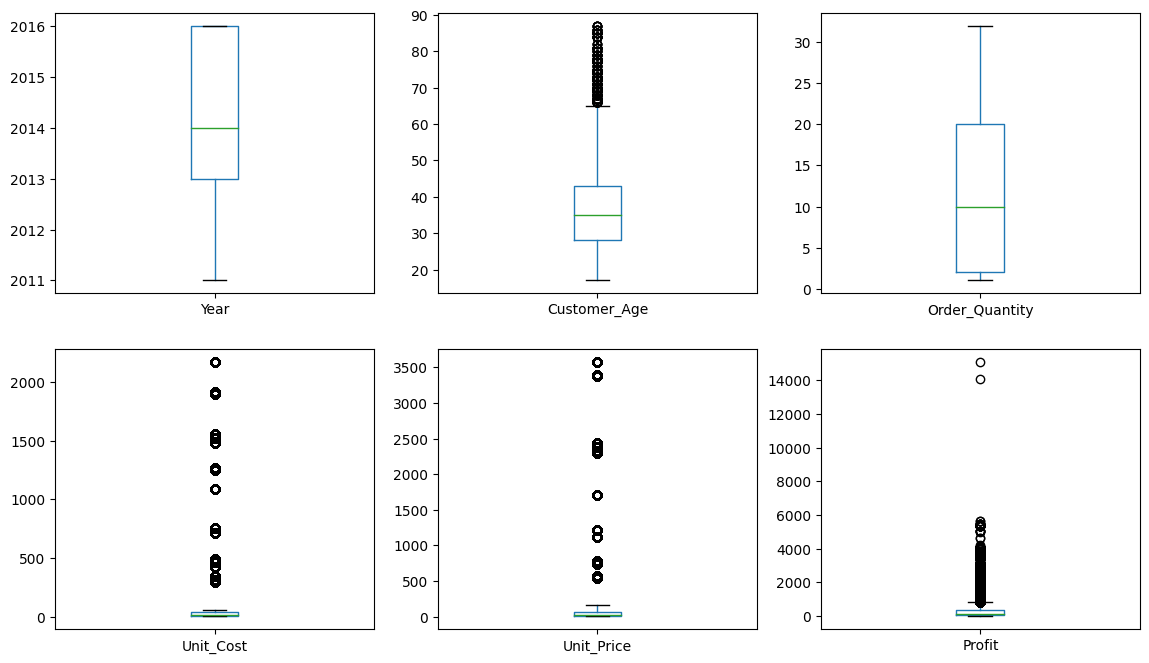

In [40]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

data[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

## 列争议

创建新列或修改现有列。

添加并计算新的Revenue_per_Age列

In [42]:
data['Revenue_per_Age'] = data['Revenue'] / data['Customer_Age']

data['Revenue_per_Age'].head()


0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

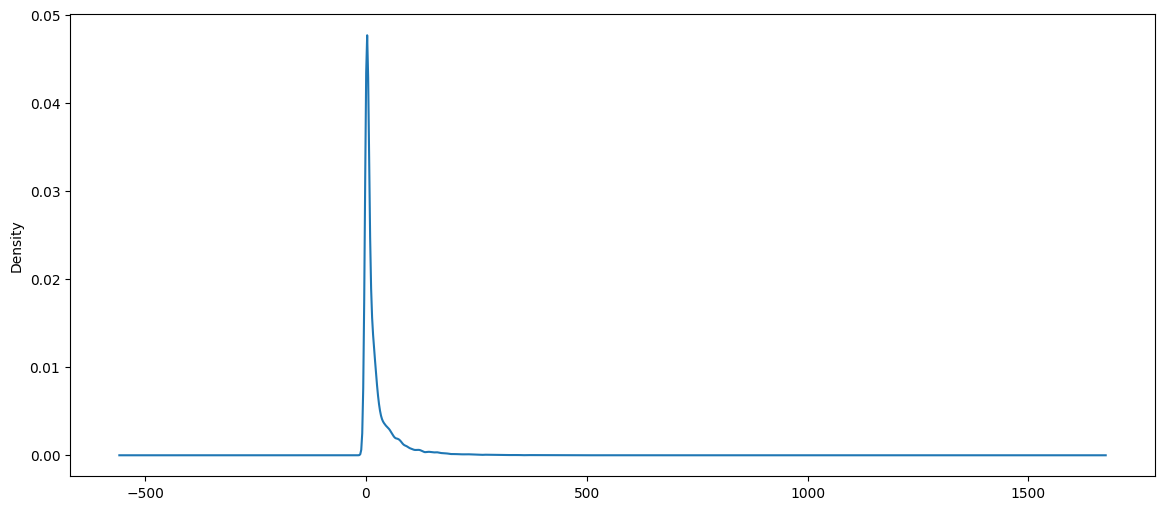

In [43]:
data['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

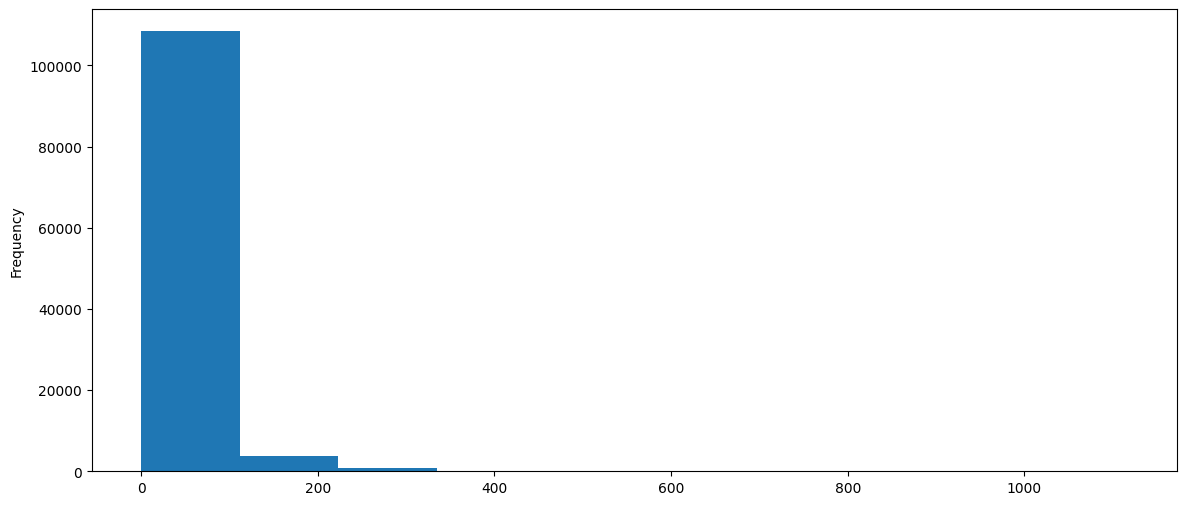

In [44]:
data['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

## 选择和索引

获取以下Kentucky州的所有销售额

In [46]:
data.loc[data['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.700
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.700
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238,5.950
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277,6.925
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914,22.850
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,35,574,403,977,24.425
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30,32,22,54,1.350
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,336,231,567,14.175
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30,16,11,27,0.675
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30,288,198,486,12.150


获取Adults (35-64)销售组的平均收入

In [47]:
data.loc[data['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

有多少条记录属于年龄组Youth (<25)或Adults (35-64) ？

In [48]:
data.loc[(data['Age_Group'] == 'Youth (<25)') | (data['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

获取销售组成Adults (35-64)的平均收入United States

In [49]:
data.loc[(data['Age_Group'] == 'Adults (35-64)')&(data['Country'] == 'United States'),'Revenue'].mean()

726.7260473588342

在法国完成的每笔销售收入增加 10%

In [51]:
data.loc[data['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

In [52]:
data.loc[data['Country'] == 'France', 'Revenue'] *= 1.1

In [53]:
data.loc[data['Country'] == 'France', 'Revenue'].head()

50     952.27
51     952.27
52    3577.97
53    3449.71
60     757.46
Name: Revenue, dtype: float64